In [2]:
#1a)
import numpy as np
import pandas as pd

scores = [88, 76, 92, 45, 67, 54, 81, 73, 60, 39, 90, 85, 77, 62, 58, 49, 95, 70, 33, 84]


df = pd.DataFrame({'Student_ID': range(1, 21), 'Score': scores})


average = np.mean(df['Score'])
highest = np.max(df['Score'])
lowest = np.min(df['Score'])

print("Class Performance:")
print(f"Average Score: {average:.2f}")
print(f"Highest Score: {highest}")
print(f"Lowest Score: {lowest}\n")


df['Result'] = np.where(df['Score'] >= 50, 'Pass', 'Fail')

print("Pass/Fail Classification:")
print(df[['Student_ID', 'Score', 'Result']])
print(f"\nNumber Passed: {(df['Result'] == 'Pass').sum()}")
print(f"Number Failed: {(df['Result'] == 'Fail').sum()}\n")

def assign_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Score'].apply(assign_grade)

print("Grading:")
print(df[['Student_ID', 'Score', 'Grade']])


Class Performance:
Average Score: 68.90
Highest Score: 95
Lowest Score: 33

Pass/Fail Classification:
    Student_ID  Score Result
0            1     88   Pass
1            2     76   Pass
2            3     92   Pass
3            4     45   Fail
4            5     67   Pass
5            6     54   Pass
6            7     81   Pass
7            8     73   Pass
8            9     60   Pass
9           10     39   Fail
10          11     90   Pass
11          12     85   Pass
12          13     77   Pass
13          14     62   Pass
14          15     58   Pass
15          16     49   Fail
16          17     95   Pass
17          18     70   Pass
18          19     33   Fail
19          20     84   Pass

Number Passed: 16
Number Failed: 4

Grading:
    Student_ID  Score Grade
0            1     88     A
1            2     76     B
2            3     92     A
3            4     45     F
4            5     67     C
5            6     54     D
6            7     81     B
7            8     

In [4]:
#1 b)
import numpy as np
import pandas as pd


A = np.array([[2, 3],
              [1, 2]])

b = np.array([8, 5])


try:
    x = np.linalg.solve(A, b)


    df = pd.DataFrame({
        'Equation': ['2x + 3y = 8', '1x + 2y = 5'],
        'A Matrix Row': [list(A[0]), list(A[1])],
        'b Value': b
    })

    print("System of Equations:")
    print(df, "\n")


    solution_df = pd.DataFrame(x, index=['x', 'y'], columns=['Solution'])

    print("Solution Vector (x):")
    print(solution_df)

except np.linalg.LinAlgError as e:
    print("Error:", e)


System of Equations:
      Equation A Matrix Row  b Value
0  2x + 3y = 8       [2, 3]        8
1  1x + 2y = 5       [1, 2]        5 

Solution Vector (x):
   Solution
x       1.0
y       2.0


Step Count Statistics:
Total Steps: 218635
Average Steps/Day: 7287.83
Maximum Steps: 12000
Minimum Steps: 3000

High Activity Days (>9000 steps): [5, 6, 11, 17, 22, 25, 26, 29, 30]



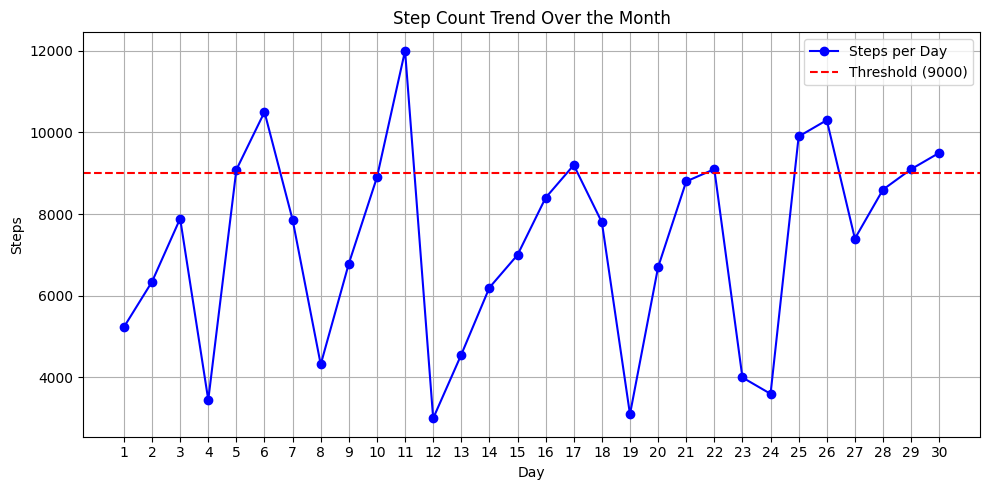

In [5]:
#2a)
import numpy as np
import matplotlib.pyplot as plt


step_counts = np.array([
    5234, 6345, 7890, 3450, 9087, 10500, 7860, 4320, 6789, 8900,
    12000, 3000, 4560, 6200, 7000, 8400, 9200, 7800, 3100, 6700,
    8800, 9100, 4000, 3600, 9900, 10300, 7400, 8600, 9100, 9500
])


total_steps = np.sum(step_counts)
average_steps = np.mean(step_counts)
max_steps = np.max(step_counts)
min_steps = np.min(step_counts)

print("Step Count Statistics:")
print(f"Total Steps: {total_steps}")
print(f"Average Steps/Day: {average_steps:.2f}")
print(f"Maximum Steps: {max_steps}")
print(f"Minimum Steps: {min_steps}\n")


threshold = 9000
high_activity_days = np.where(step_counts > threshold)[0] + 1

print(f"High Activity Days (>{threshold} steps): {high_activity_days.tolist()}\n")


plt.figure(figsize=(10, 5))
plt.plot(step_counts, marker='o', linestyle='-', color='blue', label='Steps per Day')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')
plt.title("Step Count Trend Over the Month")
plt.xlabel("Day")
plt.ylabel("Steps")
plt.xticks(ticks=np.arange(0, 30), labels=np.arange(1, 31))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Subject-wise Statistics:

Math:
  Average: 68.67
  Highest: 98
  Lowest : 40

Science:
  Average: 70.47
  Highest: 97
  Lowest : 40

English:
  Average: 67.00
  Highest: 99
  Lowest : 40

Top-Performing Students (based on Total Score):
            Math  Science  English  Total    Average
Student_ID                                          
1             84       87       93    264  88.000000
26            81       82       98    261  87.000000
21            90       95       68    253  84.333333 



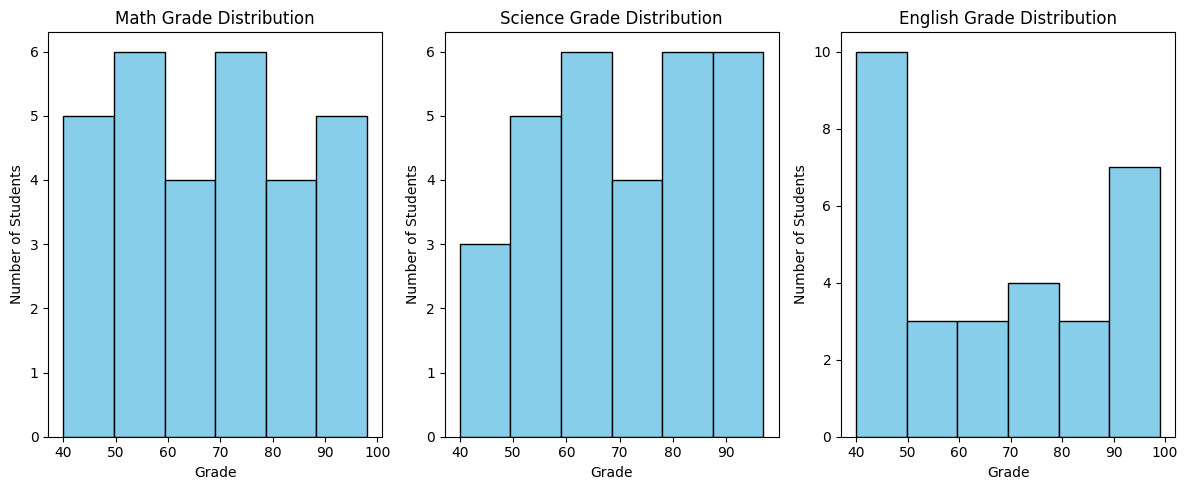

In [7]:
#2B)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(0)
grades_data = np.random.randint(40, 100, size=(30, 3))


subjects = ['Math', 'Science', 'English']
df = pd.DataFrame(grades_data, columns=subjects)
df['Student_ID'] = np.arange(1, 31)
df.set_index('Student_ID', inplace=True)


print("Subject-wise Statistics:\n")
for subject in subjects:
    print(f"{subject}:")
    print(f"  Average: {df[subject].mean():.2f}")
    print(f"  Highest: {df[subject].max()}")
    print(f"  Lowest : {df[subject].min()}\n")


df['Total'] = df.sum(axis=1)
df['Average'] = df[['Math', 'Science', 'English']].mean(axis=1)


top_students = df.sort_values(by='Total', ascending=False).head(3)

print("Top-Performing Students (based on Total Score):")
print(top_students[['Math', 'Science', 'English', 'Total', 'Average']], "\n")


plt.figure(figsize=(12, 5))
for i, subject in enumerate(subjects):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[subject], bins=6, color='skyblue', edgecolor='black')
    plt.title(f"{subject} Grade Distribution")
    plt.xlabel("Grade")
    plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()


In [8]:
#3A)
import cmath


def capacitor_impedance(C, f):
    """Return the impedance of a capacitor at frequency f (in Hz)."""
    return complex(0, -1 / (2 * cmath.pi * f * C))

def inductor_impedance(L, f):
    """Return the impedance of an inductor at frequency f (in Hz)."""
    return complex(0, 2 * cmath.pi * f * L)

def series_impedance(impedances):
    """Calculate total impedance for series connection."""
    return sum(impedances)

def parallel_impedance(impedances):
    """Calculate total impedance for parallel connection."""
    inv_total = sum(1 / z for z in impedances)
    return 1 / inv_total if inv_total != 0 else float('inf')


print("Total Impedance Calculator")


f = float(input("Enter frequency (Hz): "))


config = input("Enter circuit configuration (series/parallel): ").strip().lower()


n = int(input("Enter number of components: "))

impedances = []


for i in range(n):
    comp_type = input(f"\nComponent {i+1} type (R/C/L): ").strip().upper()

    if comp_type == 'R':
        R = float(input("Enter resistance (ohms): "))
        z = complex(R, 0)

    elif comp_type == 'C':
        C = float(input("Enter capacitance (farads): "))
        z = capacitor_impedance(C, f)

    elif comp_type == 'L':
        L = float(input("Enter inductance (henrys): "))
        z = inductor_impedance(L, f)

    else:
        print("Invalid component type.")
        continue

    print(f"Impedance of Component {i+1}: {z:.2f} Ω")
    impedances.append(z)


if config == 'series':
    total_z = series_impedance(impedances)
elif config == 'parallel':
    total_z = parallel_impedance(impedances)
else:
    print("Invalid configuration.")
    exit()

print(f"\nTotal Impedance: {total_z:.2f} Ω")
print(f"Magnitude: {abs(total_z):.2f} Ω")
print(f"Phase Angle: {cmath.phase(total_z) * 180 / cmath.pi:.2f}°")


Total Impedance Calculator
Enter frequency (Hz): 1000
Enter circuit configuration (series/parallel): series
Enter number of components: 3

Component 1 type (R/C/L): r
Enter resistance (ohms): 20
Impedance of Component 1: 20.00+0.00j Ω

Component 2 type (R/C/L): c
Enter capacitance (farads): 0.1
Impedance of Component 2: 0.00-0.00j Ω

Component 3 type (R/C/L): l
Enter inductance (henrys): 50
Impedance of Component 3: 0.00+314159.27j Ω

Total Impedance: 20.00+314159.26j Ω
Magnitude: 314159.26 Ω
Phase Angle: 90.00°


In [9]:
#3b)
import numpy as np
import pandas as pd


stock1 = np.array([
    [100, 110, 95],
    [102, 112, 97],
    [104, 115, 98],
    [106, 117, 100],
    [108, 119, 102]
])

stock2 = np.array([
    [98, 108, 93],
    [99, 109, 95],
    [101, 111, 96],
    [103, 113, 97],
    [105, 115, 99]
])


columns = ['Open', 'High', 'Low']
days = [f'Day {i+1}' for i in range(5)]


df1 = pd.DataFrame(stock1, columns=columns, index=days)
df2 = pd.DataFrame(stock2, columns=columns, index=days)


sum_df = pd.DataFrame(stock1 + stock2, columns=columns, index=days)


diff_df = pd.DataFrame(stock1 - stock2, columns=columns, index=days)


print("Stock 1 Data:\n", df1, "\n")
print("Stock 2 Data:\n", df2, "\n")
print("Element-wise Sum (Combined Prices):\n", sum_df, "\n")
print("Element-wise Difference (Daily Spread):\n", diff_df)


Stock 1 Data:
        Open  High  Low
Day 1   100   110   95
Day 2   102   112   97
Day 3   104   115   98
Day 4   106   117  100
Day 5   108   119  102 

Stock 2 Data:
        Open  High  Low
Day 1    98   108   93
Day 2    99   109   95
Day 3   101   111   96
Day 4   103   113   97
Day 5   105   115   99 

Element-wise Sum (Combined Prices):
        Open  High  Low
Day 1   198   218  188
Day 2   201   221  192
Day 3   205   226  194
Day 4   209   230  197
Day 5   213   234  201 

Element-wise Difference (Daily Spread):
        Open  High  Low
Day 1     2     2    2
Day 2     3     3    2
Day 3     3     4    2
Day 4     3     4    3
Day 5     3     4    3


<ipython-input-14-b195c0baa89f>:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  participant_stats = grouped_data.apply(calculate_statistics)


                         electrode_1  electrode_2  electrode_3
participant_id                                                
1              mean         0.063959    -0.183667     0.095397
               variance     0.563135     0.485178     0.534849
               peak         1.571713     1.515921     1.441824
               min         -1.390082    -1.375442    -1.453354
               std_dev      0.750423     0.696548     0.731334
2              mean        -0.127210    -0.141397    -0.005207
               variance     0.529745     0.532010     0.523960
               peak         1.420404     1.467062     1.358447
               min         -1.760956    -1.533939    -1.530857
               std_dev      0.727836     0.729390     0.723851
3              mean        -0.188442     0.028763    -0.102671
               variance     0.474167     0.560516     0.548256
               peak         1.497138     1.512312     1.577439
               min         -1.632598    -1.514828    -1

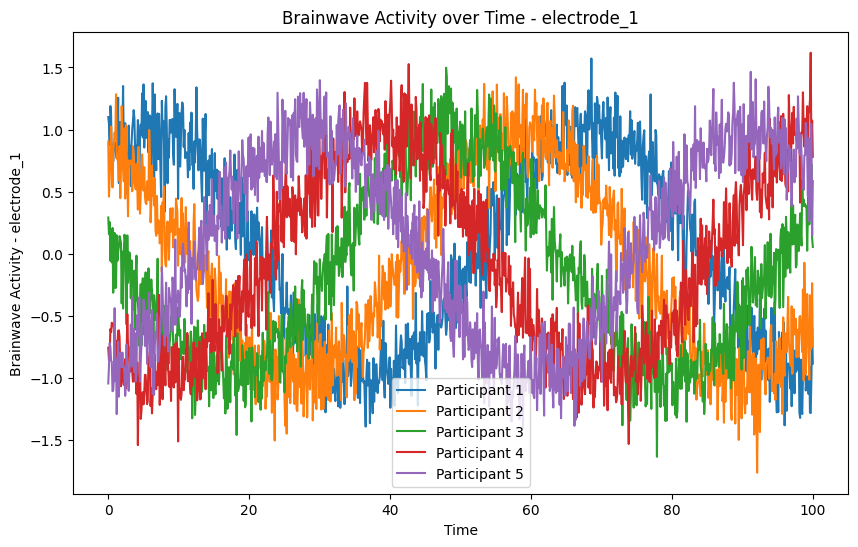

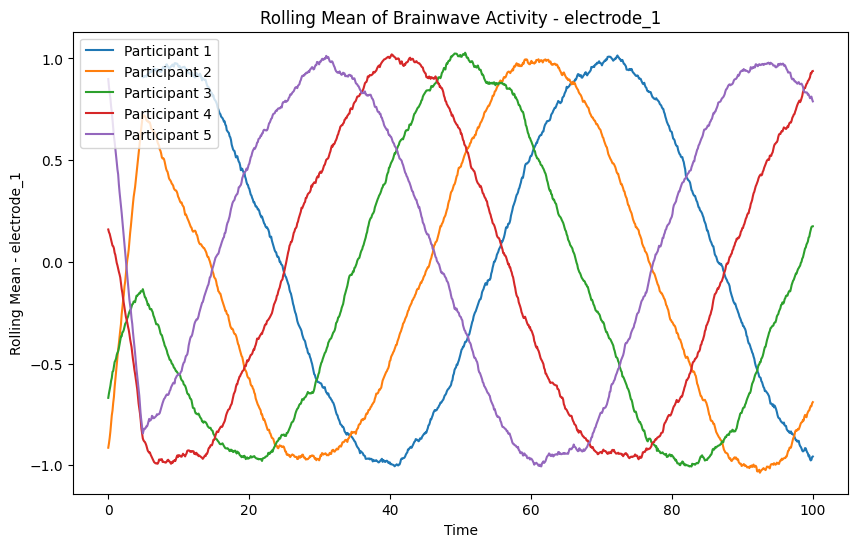

In [14]:
#4a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic EEG data for multiple participants
# Let's simulate data for 5 participants, each having measurements from 3 electrodes (electrode_1, electrode_2, electrode_3)

# Parameters
num_participants = 5
num_samples = 1000  # Time points for each participant
time = np.linspace(0, 100, num_samples)  # Simulated time points

# Generate synthetic EEG data (random values with some sinusoidal patterns for demonstration)
data = []
for participant_id in range(1, num_participants + 1):
    for t in time:
        row = {
            'participant_id': participant_id,
            'time': t,
            'electrode_1': np.sin(0.1 * t + participant_id) + np.random.normal(0, 0.2),  # Sinusoidal pattern with noise
            'electrode_2': np.cos(0.1 * t + participant_id) + np.random.normal(0, 0.2),
            'electrode_3': np.sin(0.15 * t + participant_id) + np.random.normal(0, 0.2),
        }
        data.append(row)

# Create DataFrame
eeg_data = pd.DataFrame(data)

# Step 2: Perform basic statistical analysis (mean, variance, peak values) for each participant and electrode

# Group the data by participant_id to perform analysis on each participant's data
grouped_data = eeg_data.groupby('participant_id')

# Function to calculate basic statistics (mean, variance, peak values) for each electrode
def calculate_statistics(group):
    stats = {}
    electrodes = [col for col in group.columns if col.startswith('electrode')]
    for electrode in electrodes:
        stats[electrode] = {
            'mean': group[electrode].mean(),
            'variance': group[electrode].var(),
            'peak': group[electrode].max(),
            'min': group[electrode].min(),
            'std_dev': group[electrode].std()
        }
    return pd.DataFrame(stats)

# Apply the statistics calculation for each participant
participant_stats = grouped_data.apply(calculate_statistics)

# Display the calculated statistics
print(participant_stats)

# Step 3: Identify patterns or trends in brainwave activity
# Example: Plotting the brainwave activity for one electrode across all participants
def plot_brainwave_activity(eeg_data, electrode):
    plt.figure(figsize=(10, 6))
    for participant_id, group in eeg_data.groupby('participant_id'):
        plt.plot(group['time'], group[electrode], label=f'Participant {participant_id}')

    plt.xlabel('Time')
    plt.ylabel(f'Brainwave Activity - {electrode}')
    plt.title(f'Brainwave Activity over Time - {electrode}')
    plt.legend()
    plt.show()

# Example: Plot brainwave activity for electrode_1
plot_brainwave_activity(eeg_data, 'electrode_1')

# Step 4: Identifying Trends (e.g., Change in Brainwave Activity over Time)
# We can use rolling mean or trend analysis, for example, to identify changes in brainwave activity
def plot_rolling_mean(eeg_data, electrode, window_size=50):
    eeg_data['rolling_mean'] = eeg_data[electrode].rolling(window=window_size).mean()

    plt.figure(figsize=(10, 6))
    for participant_id, group in eeg_data.groupby('participant_id'):
        plt.plot(group['time'], group['rolling_mean'], label=f'Participant {participant_id}')

    plt.xlabel('Time')
    plt.ylabel(f'Rolling Mean - {electrode}')
    plt.title(f'Rolling Mean of Brainwave Activity - {electrode}')
    plt.legend()
    plt.show()

# Example: Plot rolling mean for electrode_1 with a window size of 50
plot_rolling_mean(eeg_data, 'electrode_1', window_size=50)


Full DataFrame:
       Product  Price  Quantity  Total Value
0      Laptop   1200        10        12000
1  Smartphone    800        20        16000
2      Tablet    300        15         4500
3     Monitor    150        25         3750
4    Keyboard     50        50         2500

Most Expensive Product:
 Product        Laptop
Price            1200
Quantity           10
Total Value     12000
Name: 0, dtype: object

Sorted by Quantity:
       Product  Price  Quantity  Total Value
4    Keyboard     50        50         2500
3     Monitor    150        25         3750
1  Smartphone    800        20        16000
2      Tablet    300        15         4500
0      Laptop   1200        10        12000

Average Price: 500.0

Products with Quantity > 15:
       Product  Price  Quantity  Total Value
1  Smartphone    800        20        16000
3     Monitor    150        25         3750
4    Keyboard     50        50         2500


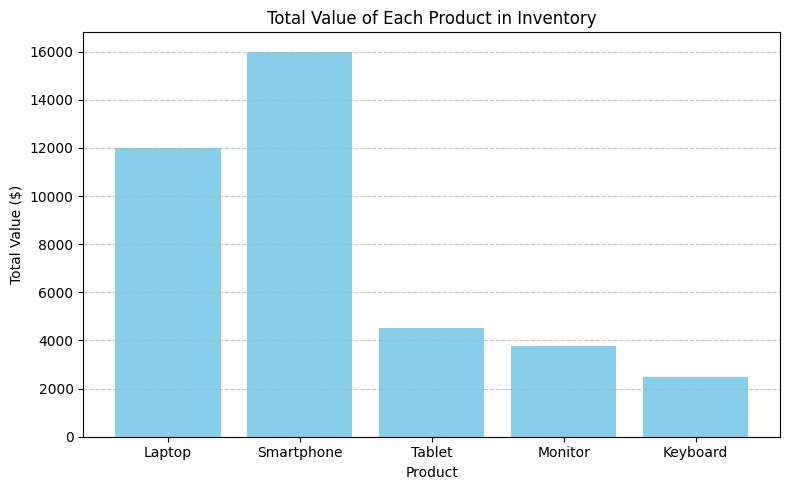

In [15]:
#4b)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial data
data = {
    'Product': ['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard'],
    'Price': [1200, 800, 300, 150, 50],
    'Quantity': [10, 20, 15, 25, 50]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# 1. Total value of each product in inventory
df['Total Value'] = df['Price'] * df['Quantity']

# 2. Find the most expensive product
most_expensive = df.loc[df['Price'].idxmax()]

# 3. Sort products by quantity in descending order
sorted_by_quantity = df.sort_values(by='Quantity', ascending=False)

# 4. Calculate average price using NumPy
average_price = np.mean(df['Price'])

# 5. Filter products with quantity more than 15
high_quantity_products = df[df['Quantity'] > 15]

# Displaying results
print("Full DataFrame:\n", df)
print("\nMost Expensive Product:\n", most_expensive)
print("\nSorted by Quantity:\n", sorted_by_quantity)
print(f"\nAverage Price: {average_price}")
print("\nProducts with Quantity > 15:\n", high_quantity_products)

# Plot: Bar chart of products vs total value
plt.figure(figsize=(8, 5))
plt.bar(df['Product'], df['Total Value'], color='skyblue')
plt.title('Total Value of Each Product in Inventory')
plt.xlabel('Product')
plt.ylabel('Total Value ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-18-56eb406bb488>:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales'].sum().reset_index()


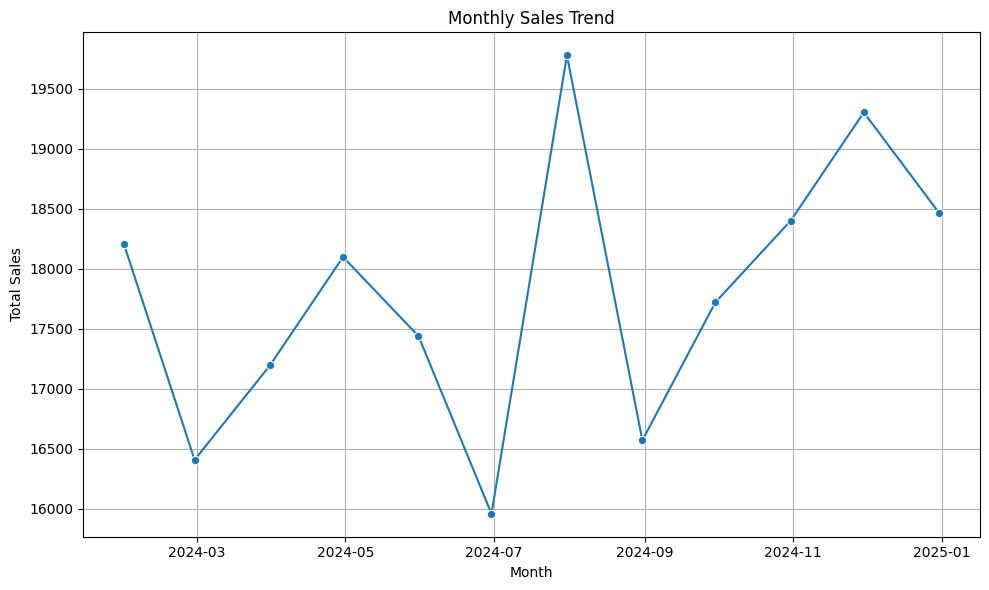

In [18]:
#5a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create sample sales data and write to CSV
date_range = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
sales_values = np.random.randint(100, 1000, size=len(date_range)).astype(float)

# Introduce a few NaN values
sales_values[10] = np.nan
sales_values[100] = np.nan

df_sample = pd.DataFrame({
    'Date': date_range,
    'Sales': sales_values
})

# Save sample file
df_sample.to_csv('sales_data.csv', index=False)

# 2. Read the CSV file
df = pd.read_csv('sales_data.csv')

# 3. Clean data
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Drop rows with missing Date or Sales
df.dropna(subset=['Date', 'Sales'], inplace=True)

# 4. Resample monthly sales
monthly_sales = df.resample('M', on='Date')['Sales'].sum().reset_index()

# 5. Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Column names and data types:

PatientID     int64
Age           int64
Gender       object
Diagnosis    object
dtype: object

Average age of patients: 50.46 years

Diagnosis distribution:

Diagnosis
Diabetes         26
Heart Disease    25
Asthma           18
Hypertension     13
Name: count, dtype: int64


<ipython-input-19-5cb41cf588dd>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diagnosis', order=diagnosis_counts.index, palette='Set2')


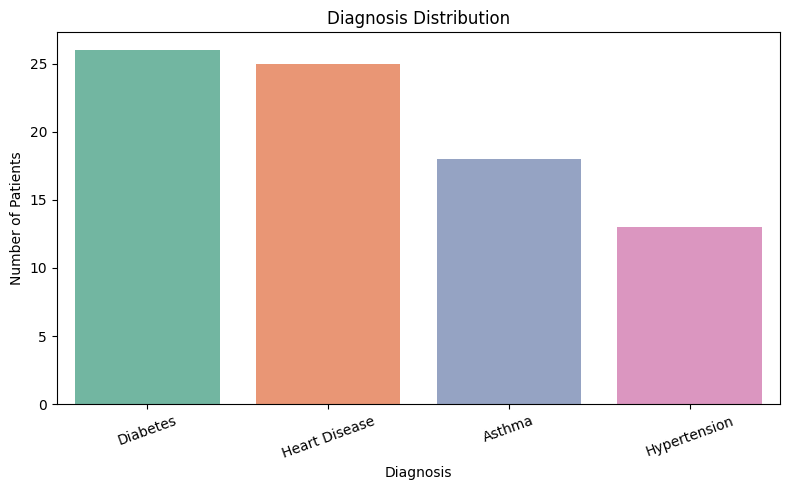

In [19]:
#5b)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Create a sample healthcare_data.csv
data = {
    'PatientID': range(1, 101),
    'Age': np.random.randint(18, 90, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Diagnosis': np.random.choice(['Hypertension', 'Diabetes', 'Asthma', 'Heart Disease', 'None'], size=100)
}

df_sample = pd.DataFrame(data)
df_sample.to_csv('healthcare_data.csv', index=False)

# STEP 2: Load the dataset
df = pd.read_csv('healthcare_data.csv')

# Display column names and their data types
print("Column names and data types:\n")
print(df.dtypes)

# STEP 3: Calculate and display average age
average_age = np.mean(df['Age'])
print(f"\nAverage age of patients: {average_age:.2f} years")

# STEP 4: Analyze distribution of diagnoses
diagnosis_counts = df['Diagnosis'].value_counts()
print("\nDiagnosis distribution:\n")
print(diagnosis_counts)

# STEP 5: Plot diagnosis distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Diagnosis', order=diagnosis_counts.index, palette='Set2')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
